# Import required libraries
Import the necessary libraries such as `heapq` and others that are required.

In [3]:
# install graphviz
!pip install graphviz


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/47.3 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.3 kB ? eta -:--:--
   ---------------------------------------- 47.3/47.3 kB 788.5 kB/s eta 0:00:00


In [1]:
import heapq  # for heap operations


# Binary Search Tree (BST)
Implement the class for the Binary Search Tree (BST) with the basic methods such as insert, search and traverse.

In [2]:
# Binary Search Tree (BST) implementation

# Node class used in the BST
class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

# BST class
class BinarySearchTree:
    def __init__(self):
        self.root = None

    # insert a key into the BST
    def insert(self, key):
        if self.root is None:
            self.root = TreeNode(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if key < node.val:
            if node.left is None:
                node.left = TreeNode(key)
            else:
                self._insert(node.left, key)
        else:
            if node.right is None:
                node.right = TreeNode(key)
            else:
                self._insert(node.right, key)

    # search for a key in the BST
    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.val == key:
            return node
        if key < node.val:
            return self._search(node.left, key)
        return self._search(node.right, key)

    # inorder traversal: left, root, right
    def inorder_traversal(self):
        result = []
        self._inorder_traversal(self.root, result)
        return result

    def _inorder_traversal(self, node, result):
        if node:
            self._inorder_traversal(node.left, result)
            result.append(node.val)
            self._inorder_traversal(node.right, result)
    
    # preorder traversal: root, left, right
    def preorder_traversal(self):
        result = []
        self._preorder_traversal(self.root, result)
        return result

    def _preorder_traversal(self, node, result):
        if node:
            result.append(node.val)
            self._preorder_traversal(node.left, result)
            self._preorder_traversal(node.right, result)

In [10]:
import time

bst = BinarySearchTree()
bst.insert(10)
bst.insert(5)
bst.insert(20)
bst.insert(3)
bst.insert(7)

# initiate time measurement for inorder traversal
start_time = time.time()
print("Inorder Traversal:", bst.inorder_traversal())
end_time = time.time()
print("Time for inorder traversal:", round((end_time - start_time) * 1e6, 2), "microseconds")

# initiate time measurement for search 7
start_time = time.time()
print("Search for 7, returns", bst.search(7) is not None)
end_time = time.time()
print("Time for search", round((end_time - start_time) * 1e6, 2), "microseconds")

# initiate time measurement for search 15
start_time = time.time()
print("Search for 15, returns", bst.search(15) is not None)
end_time = time.time()
print("Time for search:", round((end_time - start_time) * 1e6, 2), "microseconds")

Inorder Traversal: [3, 5, 7, 10, 20]
Time for inorder traversal: 86.07 microseconds
Search for 7, returns True
Time for search 49.83 microseconds
Search for 15, returns False
Time for search: 44.82 microseconds


## Insert and search
Show how to insert elements into the BST and search for elements. Add sample code and tests.

In [4]:
# Testen der BST-Einfüge- und Suchfunktionen

# Erstellen eines neuen BST
bst_test = BinarySearchTree()

# Einfügen von Elementen
bst_test.insert(15)
bst_test.insert(10)
bst_test.insert(20)
bst_test.insert(8)
bst_test.insert(12)
bst_test.insert(17)
bst_test.insert(25)

# Inorder Traversal sollte die Elemente in sortierter Reihenfolge zurückgeben
print("Inorder Traversal nach Einfügen:", bst_test.inorder_traversal())

# Suche nach vorhandenen und nicht vorhandenen Elementen
print("Suche nach 10:", bst_test.search(10) is not None)  # Sollte True zurückgeben
print("Suche nach 15:", bst_test.search(15) is not None)  # Sollte True zurückgeben
print("Suche nach 25:", bst_test.search(25) is not None)  # Sollte True zurückgeben
print("Suche nach 30:", bst_test.search(30) is not None)  # Sollte False zurückgeben

Inorder Traversal nach Einfügen: [8, 10, 12, 15, 17, 20, 25]
Suche nach 10: True
Suche nach 15: True
Suche nach 25: True
Suche nach 30: False


In [ ]:
# Beispielverwendung
bst = BinarySearchTree()
bst.insert(10)
bst.insert(5)
bst.insert(20)
bst.insert(3)
bst.insert(7)

print("Pre-Order Traversal:", bst.preorder_traversal())

Pre-Order Traversal: [10, 5, 3, 7, 20]


## Removing Nodes

In [ ]:
class BSTR(BinarySearchTree):
    def remove(self, key):
        self.root = self._remove(self.root, key)

    def _remove(self, node, key):
        if node is None:
            return node

        if key < node.val:
            node.left = self._remove(node.left, key)
        elif key > node.val:
            node.right = self._remove(node.right, key)
        else:
            # Node with only one child or no child
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left

            # Node with two children: Get the inorder successor (smallest in the right subtree)
            temp = self._min_value_node(node.right)
            node.val = temp.val
            node.right = self._remove(node.right, temp.val)

        return node

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current


In [ ]:

# Example usage
bstr = BSTR()
bstr.insert(10)
bstr.insert(5)
bstr.insert(20)
bstr.insert(3)
bstr.insert(7)


In [ ]:

print("Inorder Traversal before removal:", bstr.inorder_traversal())
bstr.remove(5)
print("Inorder Traversal after removal:", bstr.inorder_traversal())

## Visualizing the Binary Search Tree with Graphviz

To make it easier for you to understand the structure and behavior of Binary Search Trees (BST), we will use the `graphviz` library to create visual representations of our trees. Visualizations can be incredibly helpful when learning about BSTs, as they allow you to see the hierarchical relationships between nodes, such as parent-child connections and the overall shape of the tree.

With `graphviz`, we can dynamically generate and display the tree based on your inputs or operations. This approach will help you follow how elements are organized within the tree, particularly as new nodes are added or removed, making it clearer why BSTs are efficient for searching and sorting.

If you want to learn more about `graphviz` or install it for your own projects, you can visit the official documentation here: [Graphviz Documentation](https://graphviz.org/).

Below is an example of how we can use `graphviz` to visualize a BST in Python. We are using the Python library for [graphviz](https://graphviz.readthedocs.io/en/stable/index.html).

In [ ]:
from graphviz import Digraph

def visualize_bst(bst):
    if bst.root is None:
        return "The BST is empty"

    def add_edges(node, dot):
        if node.left:
            dot.edge(str(node.val), str(node.left.val))
            add_edges(node.left, dot)
        if node.right:
            dot.edge(str(node.val), str(node.right.val))
            add_edges(node.right, dot)

    dot = Digraph()
    dot.node(str(bst.root.val))
    add_edges(bst.root, dot)
    return dot

# Visualize the existing BST
dot = visualize_bst(bst)
dot.render('bst', format='png', view=True)  # This will save and open the BST visualization

'bst.png'

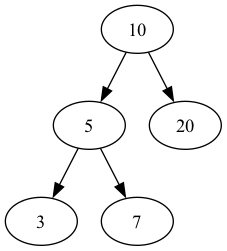

In [ ]:
from IPython.display import Image

# Render the dot diagram and display it in the notebook
dot.render('bst', format='png')


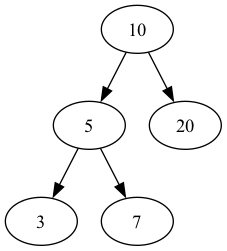

In [16]:
Image(filename='bst.png')

# Heap Implementierung
Implementiere die Klasse für den Heap (Min-Heap oder Max-Heap) mit den grundlegenden Methoden wie Einfügen und Entfernen.

In [ ]:
# Heap Implementierung

class MinHeap:
    def __init__(self):
        self.heap = []

    def insert(self, element):
        heapq.heappush(self.heap, element)

    def remove(self):
        if len(self.heap) > 0:
            return heapq.heappop(self.heap)
        return None

    def get_min(self):
        if len(self.heap) > 0:
            return self.heap[0]
        return None

    def size(self):
        return len(self.heap)

# Beispielverwendung
min_heap = MinHeap()
min_heap.insert(10)
min_heap.insert(5)
min_heap.insert(20)
min_heap.insert(3)
min_heap.insert(7)

print("Min-Heap Größe:", min_heap.size())
print("Min-Heap Minimum:", min_heap.get_min())
print("Entferne Minimum:", min_heap.remove())
print("Min-Heap Minimum nach Entfernen:", min_heap.get_min())
print("Min-Heap Größe nach Entfernen:", min_heap.size())

# Testen der Min-Heap-Einfüge- und Entfernungsfunktionen

# Erstellen eines neuen Min-Heaps
min_heap_test = MinHeap()

# Einfügen von Elementen
min_heap_test.insert(15)
min_heap_test.insert(10)
min_heap_test.insert(20)
min_heap_test.insert(8)
min_heap_test.insert(12)
min_heap_test.insert(17)
min_heap_test.insert(25)

# Überprüfen der Min-Heap-Größe und des Minimums
print("Min-Heap Größe nach Einfügen:", min_heap_test.size())
print("Min-Heap Minimum nach Einfügen:", min_heap_test.get_min())

# Entfernen des Minimums und Überprüfen des neuen Minimums
print("Entferne Minimum:", min_heap_test.remove())
print("Min-Heap Minimum nach Entfernen:", min_heap_test.get_min())
print("Min-Heap Größe nach Entfernen:", min_heap_test.size())

# Heap Einfügen und Entfernen
Zeige, wie man Elemente in den Heap einfügt und entfernt. Füge Beispielcode und Tests hinzu.

In [ ]:
# Beispielverwendung
min_heap = MinHeap()
min_heap.insert(10)
min_heap.insert(5)
min_heap.insert(20)
min_heap.insert(3)
min_heap.insert(7)

print("Min-Heap Größe:", min_heap.size())
print("Min-Heap Minimum:", min_heap.get_min())
print("Entferne Minimum:", min_heap.remove())
print("Min-Heap Minimum nach Entfernen:", min_heap.get_min())
print("Min-Heap Größe nach Entfernen:", min_heap.size())

# Testen der Min-Heap-Einfüge- und Entfernungsfunktionen

# Erstellen eines neuen Min-Heaps
min_heap_test = MinHeap()

# Einfügen von Elementen
min_heap_test.insert(15)
min_heap_test.insert(10)
min_heap_test.insert(20)
min_heap_test.insert(8)
min_heap_test.insert(12)
min_heap_test.insert(17)
min_heap_test.insert(25)

# Überprüfen der Min-Heap-Größe und des Minimums
print("Min-Heap Größe nach Einfügen:", min_heap_test.size())
print("Min-Heap Minimum nach Einfügen:", min_heap_test.get_min())

# Entfernen des Minimums und Überprüfen des neuen Minimums
print("Entferne Minimum:", min_heap_test.remove())
print("Min-Heap Minimum nach Entfernen:", min_heap_test.get_min())
print("Min-Heap Größe nach Entfernen:", min_heap_test.size())